In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
image = Image.open('2D_small.tif').convert('L')
image_array = np.array(image)

In [4]:
hist, bin_edges = np.histogram(image_array.flatten(), bins=256, range=(0, 255))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0

In [5]:
# Compute the histogram of the image
hist, bin_edges = np.histogram(image_array.flatten(), bins=256, range=(0, 255))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0

# Total number of pixels
total_pixels = image_array.size

# Equal Masses Thresholding
# Calculate the cumulative histogram
cum_hist = np.cumsum(hist)

# Find the intensity where cumulative histogram reaches half of total pixels
half_total = total_pixels / 2

# Get indices where cumulative histogram is greater than or equal to half_total
indices = np.where(cum_hist >= half_total)

# Extract the array of indices from the tuple
indices_array = indices[0]

# Get the first index where the condition is met
equal_mass_index = indices_array[0]

# Find the corresponding intensity value (threshold)
equal_mass_threshold = bin_centers[equal_mass_index]
print(f'Equal Masses Threshold: {equal_mass_threshold}')


Equal Masses Threshold: 157.880859375


In [6]:
# Mean Iteration Thresholding

# Initialize the threshold T to the mean intensity of the image
T = image_array.mean()  # Starting threshold
tolerance = 0.5         # Tolerance level for convergence
delta_T = np.inf        # Initialize the change in threshold to infinity

# Start the iteration process
while delta_T > tolerance:
    # Separate pixels into two groups based on the current threshold T
    lower_group = image_array[image_array <= T]  # Pixels with intensity <= T
    upper_group = image_array[image_array > T]   # Pixels with intensity > T

    # Calculate the mean intensity of each group
    if lower_group.size > 0:
        mean_lower = lower_group.mean()
    else:
        mean_lower = 0  # If the group is empty, set mean to 0

    if upper_group.size > 0:
        mean_upper = upper_group.mean()
    else:
        mean_upper = 0  # If the group is empty, set mean to 0

    # Update the threshold to the average of the means of the two groups
    T_new = (mean_lower + mean_upper) / 2

    # Calculate the change in threshold
    delta_T = abs(T_new - T)

    # Update threshold for the next iteration
    T = T_new

# After convergence, assign the final threshold value
mean_iter_threshold = T
print(f'Mean Iteration Threshold: {mean_iter_threshold}')


Mean Iteration Threshold: 195.66057716992958


In [7]:
# Otsu's Thresholding

# Normalize the histogram to get the probability of each intensity level
probabilities = hist / total_pixels  # Each element represents the probability of that intensity

# Compute cumulative sums for class probabilities (omega) and class means (mu)
omega = np.cumsum(probabilities)                # Cumulative sum of probabilities up to each intensity
mu = np.cumsum(probabilities * bin_centers)     # Cumulative sum of (probability * intensity)

# Compute the total mean intensity of the image
mu_total = mu[-1]  # The last element of mu represents the total mean

# Compute between-class variance for all possible thresholds
sigma_b_squared = (mu_total * omega - mu) ** 2 / (omega * (1 - omega) + 1e-6)

# Find the threshold that maximizes the between-class variance
otsu_index = np.argmax(sigma_b_squared)       # Index where sigma_b_squared is maximum
otsu_threshold = bin_centers[otsu_index]      # Corresponding intensity value

print(f"Otsu's Threshold: {otsu_threshold}")


Otsu's Threshold: 194.736328125


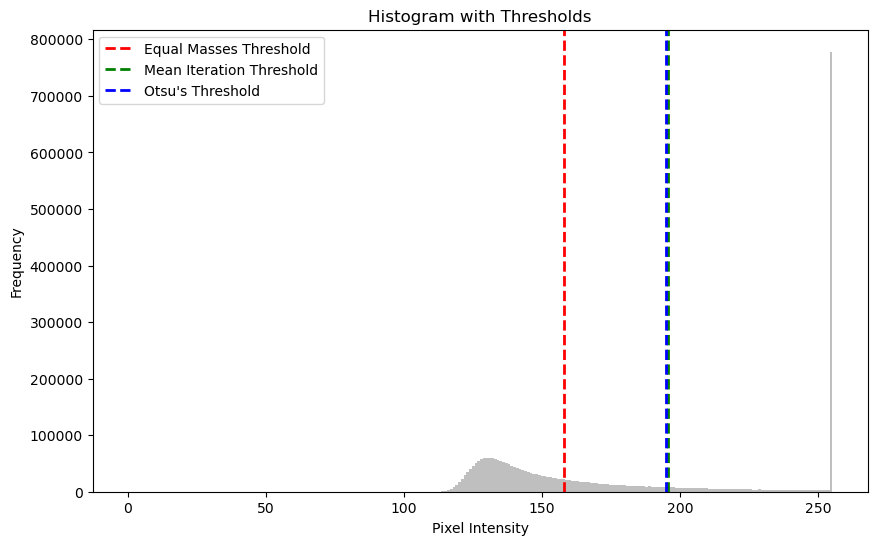

In [8]:
# Plot the histogram and mark the thresholds
plt.figure(figsize=(10, 6))  # Create a figure with specified size

# Plot the histogram of pixel intensities
plt.hist(image_array.flatten(), bins=256, range=(0, 255), color='gray', alpha=0.5)
# Parameters:
# - image_array.flatten(): Flatten the 2D image array into 1D for histogram plotting
# - bins=256: Number of bins corresponding to possible intensity values (0-255)
# - range=(0, 255): The range of intensity values
# - color='gray', alpha=0.5: Appearance settings for the histogram bars

# Mark the Equal Masses Threshold with a vertical dashed red line
plt.axvline(equal_mass_threshold, color='red', linestyle='dashed', linewidth=2, label='Equal Masses Threshold')

# Mark the Mean Iteration Threshold with a vertical dashed green line
plt.axvline(mean_iter_threshold, color='green', linestyle='dashed', linewidth=2, label='Mean Iteration Threshold')

# Mark Otsu's Threshold with a vertical dashed blue line
plt.axvline(otsu_threshold, color='blue', linestyle='dashed', linewidth=2, label="Otsu's Threshold")

# Add legend to identify the thresholds
plt.legend()

# Add title and labels to the plot
plt.title('Histogram with Thresholds')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Display the plot
plt.show()


In [9]:
# Binarize the image using Equal Masses Threshold
binary_equal_mass = np.where(image_array >= equal_mass_threshold, 1, 0)
# Pixels with intensity >= equal_mass_threshold are set to 1, others to 0

# Binarize the image using Mean Iteration Threshold
binary_mean_iter = np.where(image_array >= mean_iter_threshold, 1, 0)
# Pixels with intensity >= mean_iter_threshold are set to 1, others to 0

# Binarize the image using Otsu's Threshold
binary_otsu = np.where(image_array >= otsu_threshold, 1, 0)
# Pixels with intensity >= otsu_threshold are set to 1, others to 0


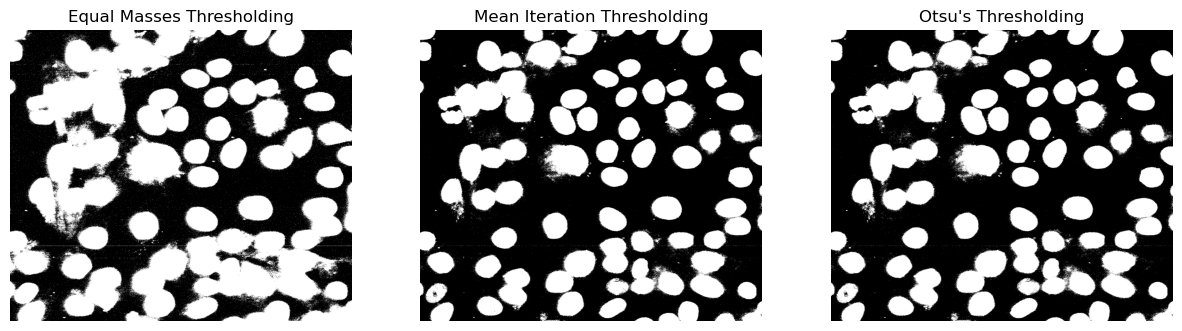

In [10]:
# Display the binarized images
plt.figure(figsize=(15, 5))  # Create a figure with specified size

# Display the Equal Masses Thresholding result
plt.subplot(1, 3, 1)  # Create a subplot grid of 1 row and 3 columns, position 1
plt.imshow(binary_equal_mass, cmap='gray')  # Display the binary image in grayscale
plt.title('Equal Masses Thresholding')      # Add a title
plt.axis('off')                             # Hide axis ticks and labels

# Display the Mean Iteration Thresholding result
plt.subplot(1, 3, 2)  # Position 2
plt.imshow(binary_mean_iter, cmap='gray')
plt.title('Mean Iteration Thresholding')
plt.axis('off')

# Display Otsu's Thresholding result
plt.subplot(1, 3, 3)  # Position 3
plt.imshow(binary_otsu, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')

# Show the plot with all subplots
plt.show()


In [13]:
image_normalized = image_array / 255.0
def gamma_correction(image, gamma):
    # Apply gamma correction
    corrected_image = np.power(image, gamma)
    return corrected_image


In [14]:
# Gamma values
gamma_less_than_one = 0.5
gamma_greater_than_one = 2.0

# Apply gamma correction
image_gamma_lt1 = gamma_correction(image_normalized, gamma_less_than_one)
image_gamma_gt1 = gamma_correction(image_normalized, gamma_greater_than_one)


In [15]:
# Scale back to [0, 255]
image_gamma_lt1_scaled = np.uint8(image_gamma_lt1 * 255)
image_gamma_gt1_scaled = np.uint8(image_gamma_gt1 * 255)


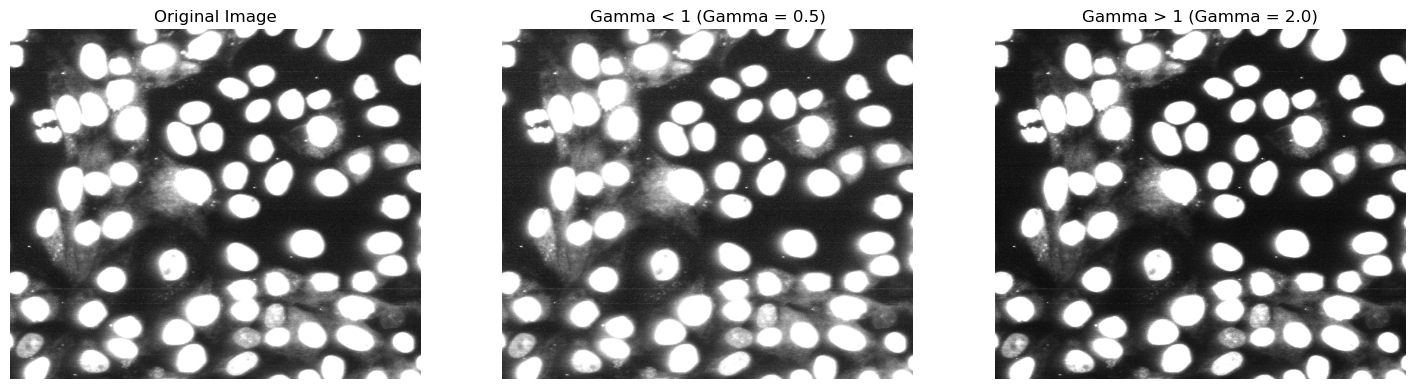

In [16]:
# Plot the images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_gamma_lt1_scaled, cmap='gray')
plt.title(f'Gamma < 1 (Gamma = {gamma_less_than_one})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_gamma_gt1_scaled, cmap='gray')
plt.title(f'Gamma > 1 (Gamma = {gamma_greater_than_one})')
plt.axis('off')

plt.show()
